In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

## 1. Load data

In [3]:
# Read data into a pandas dataframe
all_data = pd.read_csv("Building_in_Hurricane.csv")
all_data

,overall_building_condition,max_mph,age_yrs,number_of_stories,roof_shape,roof_cover,wall_cladding,structural_framing_system
0,0,80,14.0,1.0,Complex,Tile (clay),Stucco,Wood-frame
1,1,80,29.0,2.0,Gable,Tile (clay),Stucco,Wood-frame
2,0,85,27.0,2.0,Complex,Tile (clay),Stucco,Wood-frame
3,1,85,24.0,1.0,Hip,Asphalt shingles (laminated),Stucco,Wood-frame
4,1,85,30.0,2.0,Gable,Asphalt shingles (laminated),Wood Siding,Wood-frame
...,...,...,...,...,...,...,...,...
921,1,95,40.0,1.0,Gambrel,Asphalt shingles (3-tab),Wood Siding,Wood-frame
922,1,90,38.0,1.0,Gable,Asphalt shingles (3-tab),Wood Siding,Wood-frame
923,1,105,22.0,2.0,Gable,Asphalt shingles (3-tab),Vinyl Siding,Wood-frame
924,0,100,16.0,1.0,Hip,Asphalt shingles (3-tab),Stucco,Wood-frame


## 2. Data preprocessing
### Prepare input and output data

In [4]:
X = all_data.iloc[:, [1,2,3,4,5,6,7]].values
Y = all_data.iloc[:, 0]

print('X shape: ', X.shape)
print('X: ', X)
print('y shape: ', Y.shape)
print('Y: ', Y)

X shape:  (926, 7)
X:  [[80 14.0 1.0 ... 'Tile (clay)' 'Stucco' 'Wood-frame']
 [80 29.0 2.0 ... 'Tile (clay)' 'Stucco' 'Wood-frame']
 [85 27.0 2.0 ... 'Tile (clay)' 'Stucco' 'Wood-frame']
 ...
 [105 22.0 2.0 ... 'Asphalt shingles (3-tab)' 'Vinyl Siding' 'Wood-frame']
 [100 16.0 1.0 ... 'Asphalt shingles (3-tab)' 'Stucco' 'Wood-frame']
 [105 50.0 2.0 ... 'Asphalt shingles (3-tab)' 'Wood Siding' 'Wood-frame']]
y shape:  (926,)
Y:  0      0
1      1
2      0
3      1
4      1
      ..
921    1
922    1
923    1
924    0
925    2
Name: overall_building_condition, Length: 926, dtype: int64


In [5]:
Y.value_counts()

1    441
0    288
2    197
Name: overall_building_condition, dtype: int64

### Encode categorical variables

In [6]:
# Encoding Categorical Variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

X[:,3] = le.fit_transform(X[:,3]) #roof_shape
X[:,4] = le.fit_transform(X[:,4]) #roof_cover
X[:,5] = le.fit_transform(X[:,5]) #wall_cladding
X[:,6] = le.fit_transform(X[:,6]) #structural_framing_system


In [7]:
X[1,3]

2

In [8]:
class_names = ['No Damage','Moderately Damaged','Destroyed']

### Split into train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1993)

print('X_train shape: ', X_train.shape)
print('Y_train shape: ', Y_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_test shape: ', Y_test.shape)


X_train shape:  (740, 7)
Y_train shape:  (740,)
X_test shape:  (186, 7)
Y_test shape:  (186,)


## 3. MODELS

### 3.1 Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression(max_iter=2000)

logisticRegressionModel.fit(X_train, Y_train)

LogisticRegression(max_iter=2000)

LogisticRegression  Mean accuracy (train) is   :  0.5621621621621622
LogisticRegression  Mean accuracy (test)  is   :  0.510752688172043
LogisticRegression  F1 Score      (test)  is   :  0.510752688172043
Confusion matrix, without normalization


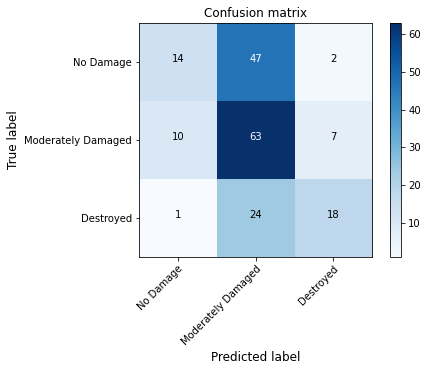

In [11]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = logisticRegressionModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix',normalize=False)


### 3.2 Decision Tree 

In [12]:
from sklearn.tree import DecisionTreeClassifier

decisionTreeModel = DecisionTreeClassifier(max_depth=None, random_state = 1993)
decisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1993)

DecisionTreeClassifier  Mean accuracy (train) is   :  0.9702702702702702
DecisionTreeClassifier  Mean accuracy (test)  is   :  0.5860215053763441
DecisionTreeClassifier  F1 Score      (test)  is   :  0.5860215053763441
Confusion matrix, without normalization


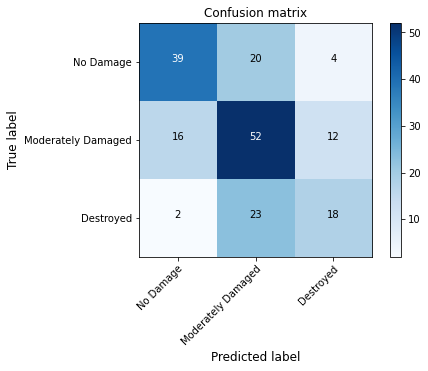

In [13]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = decisionTreeModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix',normalize=False)


### 3.3 Random Forest 

In [14]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(n_estimators=50, max_depth=10, random_state = 1993)
randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=1993)

RandomForestClassifier  Mean accuracy (train) is   :  0.9216216216216216
RandomForestClassifier  Mean accuracy (test)  is   :  0.6451612903225806
RandomForestClassifier  F1 Score      (test)  is   :  0.6451612903225806
Confusion matrix, without normalization


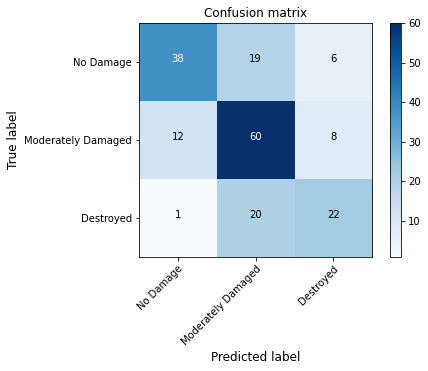

In [15]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = randomForestModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix',normalize=False)


### 3.4 K-Nearest Neighbors 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors = 3)

knnModel.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier  Mean accuracy (train) is   :  0.7702702702702703
KNeighborsClassifier  Mean accuracy (test)  is   :  0.5913978494623656
KNeighborsClassifier  F1 Score      (test)  is   :  0.5913978494623656
Confusion matrix, without normalization


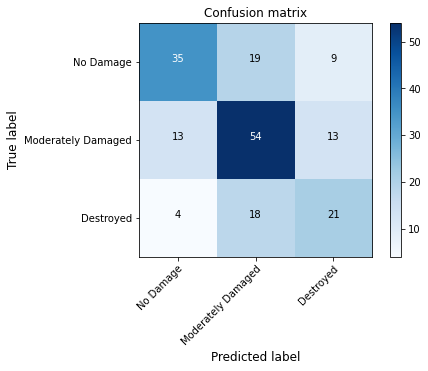

In [17]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = knnModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)

### 3.5 Support Vector Machine


In [20]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'poly', random_state = 1993) # poly linear

SVCModel.fit(X_train,Y_train)

SVC(kernel='poly', random_state=1993)

SVC  Mean accuracy (train) is   :  0.518918918918919
SVC  Mean accuracy (test)  is   :  0.489247311827957
SVC  F1 Score      (test)  is   :  0.489247311827957
Confusion matrix, without normalization


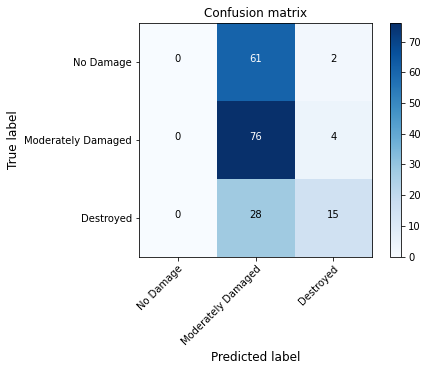

In [21]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = SVCModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)

## 3.6 Multilayer Perceptron (Neural Network)

In [24]:
from sklearn.neural_network import MLPClassifier

MLPModel = MLPClassifier(hidden_layer_sizes=(50,50,50), random_state=1993)

MLPModel.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), random_state=1993)

MLPClassifier  Mean accuracy (train) is   :  0.6405405405405405
MLPClassifier  Mean accuracy (test)  is   :  0.6021505376344086
MLPClassifier  F1 Score      (test)  is   :  0.6021505376344086
Confusion matrix, without normalization


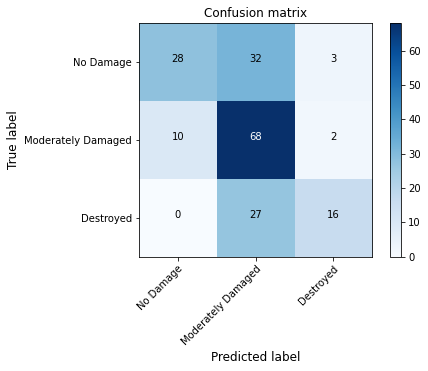

In [25]:
from plotUtils import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = MLPModel

print(type(model).__name__,' Mean accuracy (train) is   : ' ,model.score(X_train, Y_train))
print(type(model).__name__,' Mean accuracy (test)  is   : ' ,model.score(X_test, Y_test))
    
Y_pred = model.predict(X_test)
print(type(model).__name__,' F1 Score      (test)  is   : ' ,f1_score(Y_test.to_numpy(),Y_pred, average='micro'))
cnf_matrix = confusion_matrix(Y_test.to_numpy(),Y_pred)
plot_confusion_matrix(cnf_matrix, classes=class_names)